In [2]:
pip install WordCloud

  Obtaining dependency information for WordCloud from https://files.pythonhosted.org/packages/b9/74/6a15f68f59bc90032bfcf62eca796a5675be95e1aaf84f7861e1bfcfa8e5/wordcloud-1.9.4-cp312-cp312-win_amd64.whl.metadata
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/301.2 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 3.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from wordcloud import WordCloud  # Import WordCloud


In [22]:
df = pd.read_csv("updated_data.csv")
df = df[(df != 'unknown').all(axis=1)]

C:\Users\vidhi\AppData\Local\Temp\ipykernel_19664\1911683625.py:1: DtypeWarning: Columns (19,20,21,22,23,24,53,54,55,56,57) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("updated_data.csv")


In [23]:
df.columns

Index(['Unnamed: 0', 'date', 'district', 'city', 'facilityid', 'doctorname',
       'medongoid', 'appointmenttime', 'gender', 'age', 'diagnosis',
       'Symptom1', 'Duration1', 'Symptom2', 'Duration2', 'Symptom3',
       'Duration3', 'Symptom4', 'Duration4', 'Symptom5', 'Duration5',
       'Symptom6', 'Duration6', 'Symptom7', 'Duration7', 'Symptom8',
       'Duration8', 'Symptom9', 'Duration9', 'Symptom10', 'Duration10',
       'drug_1', 'dosage_1', 'duration_1', 'drug_2', 'dosage_2', 'duration_2',
       'drug_3', 'dosage_3', 'duration_3', 'drug_4', 'dosage_4', 'duration_4',
       'drug_5', 'dosage_5', 'duration_5', 'drug_6', 'dosage_6', 'duration_6',
       'drug_7', 'dosage_7', 'duration_7', 'drug_8', 'dosage_8', 'duration_8',
       'drug_9', 'dosage_9', 'duration_9', 'drug_10', 'dosage_10',
       'duration_10', 'drug_11', 'dosage_11', 'duration_11', 'drug_12',
       'dosage_12', 'duration_12', 'drug_13', 'dosage_13', 'duration_13',
       'drug_14', 'dosage_14', 'duration_14']

In [24]:
df = df.drop(columns=[
    'Symptom1', 'Duration1', 'Symptom2', 'Duration2', 'Symptom3', 'Duration3',
    'Symptom4', 'Duration4', 'Symptom5', 'Duration5', 'Symptom6', 'Duration6',
    'Symptom7', 'Duration7', 'Symptom8', 'Duration8', 'Symptom9', 'Duration9',
    'Symptom10', 'Duration10', 'drug_1', 'dosage_1', 'duration_1', 'drug_2',
    'dosage_2', 'duration_2', 'drug_3', 'dosage_3', 'duration_3', 'drug_4',
    'dosage_4', 'duration_4', 'drug_5', 'dosage_5', 'duration_5', 'drug_6',
    'dosage_6', 'duration_6', 'drug_7', 'dosage_7', 'duration_7', 'drug_8',
    'dosage_8', 'duration_8', 'drug_9', 'dosage_9', 'duration_9', 'drug_10',
    'dosage_10', 'duration_10', 'drug_11', 'dosage_11', 'duration_11', 'drug_12',
    'dosage_12', 'duration_12', 'drug_13', 'dosage_13', 'duration_13', 'drug_14',
    'dosage_14', 'duration_14'
])

In [25]:
df.head()

,Unnamed: 0,date,district,city,facilityid,doctorname,medongoid,appointmenttime,gender,age,diagnosis
0,0,2017-06-10,West,Uttam Nagar,320721,NISHANT,1.162021e+09,13:07:17,0,30.0,['body pain']
1,1,2018-04-26,West,Vikas Puri,310710,Dr. Ravikant,1.116585e+09,12:26:25,1,31.0,['acute respiratory tract infection']
2,2,2019-01-04,West,Vikas Puri,310710,Dr. Ravikant,1.367039e+09,10:06:51,1,28.0,['influenza']
3,3,2018-12-03,West,Vikas Puri,310724,Shailender,1.120420e+09,08:47:58,1,35.0,"['dermatitis+eczema', 'gastroenteritis']"
4,4,2019-06-29,West,Uttam Nagar,320712,Dr. R.C.Khanna,1.367939e+09,11:41:40,1,42.0,['back pain']


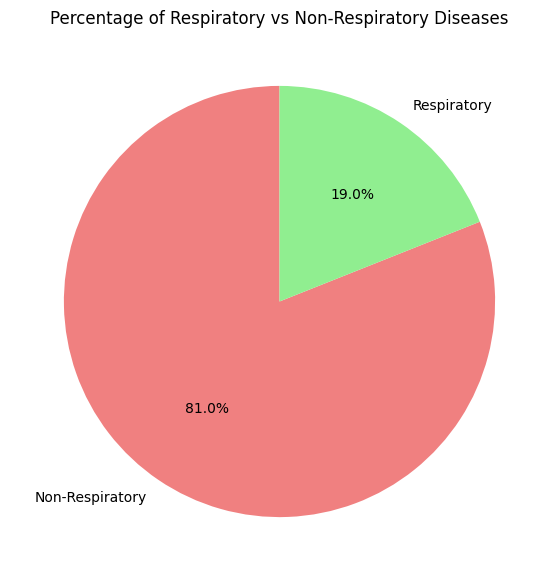

In [26]:
# List of respiratory diseases
respiratory_diseases = [
    "acute bronchitis", "acute lower respiratory infection", "acute nasopharyngitis", "acute pharyngitis", "acute respiratory infections",
    "acute sinusitis", "acute upper respiratory infections", "acute upper respiratory infections+multiple or unspecified sites", 
    "allergic bronchitis", "allergic cough", "allergic pneumonia", "allergic pneumonitis", "allergic rhinitis", "asthma", 
    "asthma+known case", "asthmatic bronchitis", "bacterial pneumonia not elsewhere classified", "bronchitis", 
    "bronchitis that is not specified as acute or chronic", "chest wheeze", "chronic cold", "chronic cough", 
    "chronic lower respiratory diseases", "chronic pharyngitis", "chronic respiratory disease", "cold", "cold+allergy", 
    "cold+cough", "cold+cough+fever", "cold+cough+headache", "cold+fever", "cold+pharyngitis", "common cold", 
    "Congenital bronchial atresia", "COPD", "cough+abdominal pain", "cough+body pain", "cough+chest pain", "cough+cold", 
    "cough+dyspnea", "cough+expectoration", "cough+hemoptysis", "cough+hypertension", "dry cough", "dyspnea", 
    "dyspnea+chronic obstructive pulmonary disease", "dyspnea+copd", "emphysema", "hib pneumonia", "hyperpneumonitis", 
    "hypersensitivity pneumonitis", "hypersensitivity pneumonitis+treatment", "infection+chest", "infection+nose", 
    "inflammation+nasal ala", "influenza", "influenza caused by an identified influenza virus", "influenza+anemia", 
    "influenza+pneumonia", "laryngeal disorder", "laryngitis", "lower respiratory tract infection", 
    "lower respiratory tract infection+bronchitis", "lung cancer", "lung metastases", "other chronic obstructive pulmonary disease", 
    "pertussis", "pharyngitis", "pharyngitis+swelling", "pleural effusion", "pleurisy", "pleuritis", "pneumococcal pneumonia", 
    "pneumocystis", "pneumonia", "pneumonia, unspecified organism", "pneumonia+recovering", "pneumonitis", "pneumonitis+recovering", 
    "pneumothorax", "pulmonary tuberculosis", "purulent cough", "purulent sputum", "respiratory syncytial virus", 
    "respiratory tract infection", "respiratory tract infections", "rhinitis", "rhinorrhea", "sinus", "sinus formation at operative site", 
    "sinus tachycardia", "sinusitis", "sneezing", "status asthmaticus", "sternutation", "swelling+throat", "swine flu", 
    "tachypnea", "throat infection", "throat irritation", "throat swelling", "tonsillitis", "tonsillopharyngitis", 
    "tropical pulmonary eosinophilia", "unspecified acute lower respiratory infection", "unspecified chronic bronchitis", 
    "upper respiratory cough", "upper respiratory infection", "upper respiratory infection+common cold", 
    "upper respiratory infection+fever", "upper respiratory infection+pain", "upper respiratory tract infection", 
    "upper respiratory tract infection+cold", "upper respiratory tract infections", "viral flu", "viral influenza", 
    "viral pneumonia, not elsewhere classified", "viral+cough", "wheezing"
]

# Convert diagnosis from string to actual list using ast.literal_eval
df['diagnosis'] = df['diagnosis'].apply(ast.literal_eval)

# Function to check if diagnosis contains respiratory diseases
def is_respiratory(diagnoses):
    return any(diagnosis in respiratory_diseases for diagnosis in diagnoses)

# Apply the function to create a new column for respiratory classification
df['is_respiratory'] = df['diagnosis'].apply(is_respiratory)

# Count respiratory vs non-respiratory diseases
disease_counts = df['is_respiratory'].value_counts()

# Ensure the labels match the values in disease_counts
labels = ['Non-Respiratory' if label == 0 else 'Respiratory' for label in disease_counts.index]

# Plotting the Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(disease_counts.values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Percentage of Respiratory vs Non-Respiratory Diseases')
plt.show()

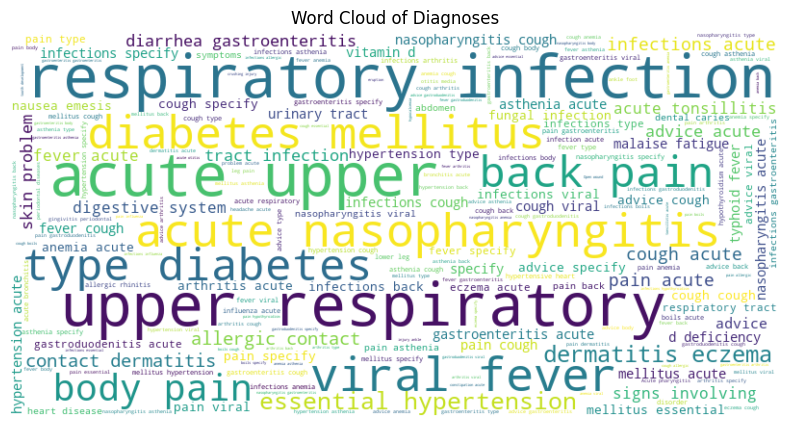

In [27]:
all_diagnoses = " ".join([", ".join(diagnosis) for diagnosis in df['diagnosis']])

# Generate the Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_diagnoses)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of Diagnoses')
plt.show()

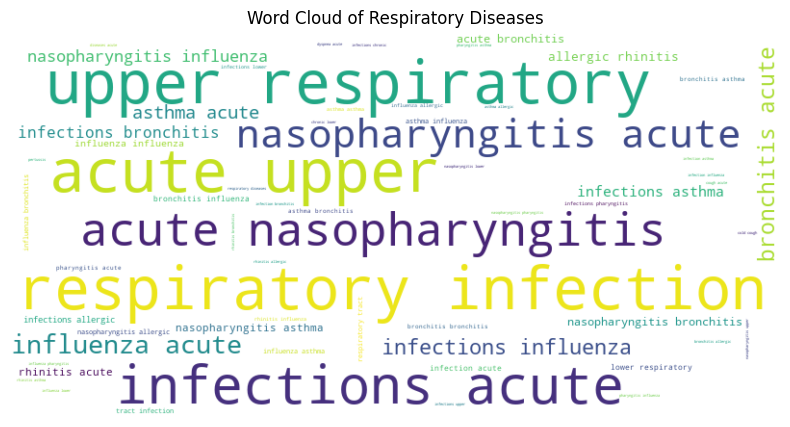

In [28]:
filtered_diagnoses = [disease for diagnosis_list in df['diagnosis'] for disease in diagnosis_list if disease in respiratory_diseases]

# Combine the filtered diagnoses into a single string
all_respiratory_diseases = " ".join(filtered_diagnoses)

# Generate the Word Cloud for respiratory diseases
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_respiratory_diseases)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of Respiratory Diseases')
plt.show()

C:\Users\vidhi\AppData\Local\Temp\ipykernel_19664\1005663947.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respiratory_df['Year_Month'] = respiratory_df['date'].dt.to_period('M')


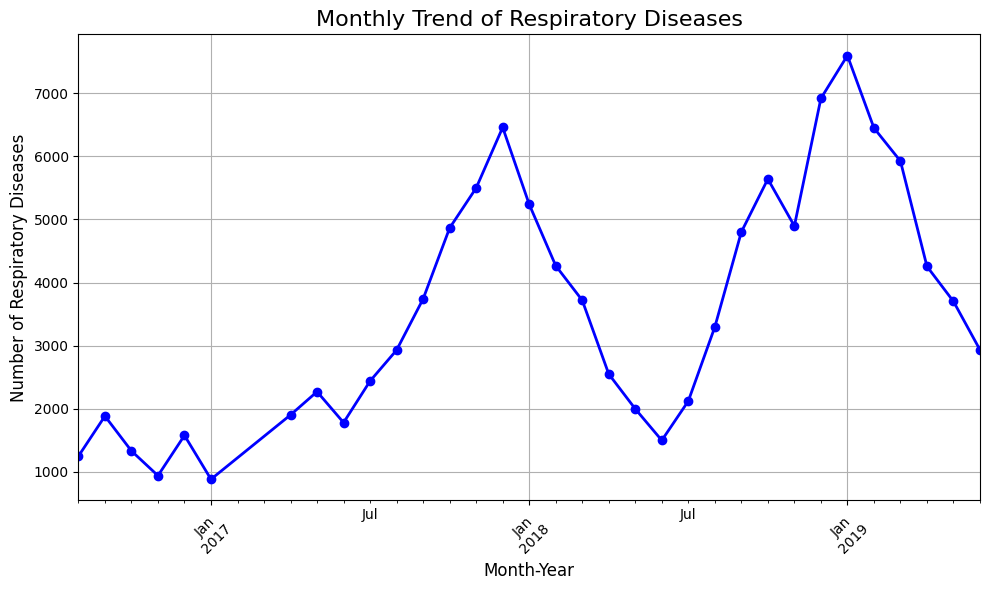

In [29]:
df['respiratory_diagnosis'] = df['diagnosis'].apply(lambda x: any(disease in respiratory_diseases for disease in x))

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter the dataframe for respiratory diseases
respiratory_df = df[df['respiratory_diagnosis']]

# Extract Year and Month for grouping
respiratory_df['Year_Month'] = respiratory_df['date'].dt.to_period('M')

# Group by Year_Month and count the occurrences of respiratory diseases
monthly_counts = respiratory_df.groupby('Year_Month').size()

# Plotting the trend of respiratory diseases over time
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='line', marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.title('Monthly Trend of Respiratory Diseases', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Number of Respiratory Diseases', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# List of respiratory diseases to filter
respiratory_diseases = [
    "acute bronchitis", "acute lower respiratory infection", "acute nasopharyngitis", 
    "acute pharyngitis", "acute respiratory infections", "acute sinusitis", 
    "acute upper respiratory infections", "acute upper respiratory infections+multiple or unspecified sites", 
    "allergic bronchitis", "allergic cough", "allergic pneumonia", "allergic pneumonitis", 
    "allergic rhinitis", "asthma", "asthma+known case", "asthmatic bronchitis", 
    "bacterial pneumonia not elsewhere classified", "bronchitis", 
    "bronchitis that is not specified as acute or chronic", "chest wheeze", "chronic cold", 
    "chronic cough", "chronic lower respiratory diseases", "chronic pharyngitis", 
    "chronic respiratory disease", "cold", "cold+allergy", "cold+cough", "cold+cough+fever", 
    "cold+cough+headache", "cold+fever", "cold+pharyngitis", "common cold", 
    "Congenital bronchial atresia", "COPD", "cough+abdominal pain", "cough+body pain", 
    "cough+chest pain", "cough+cold", "cough+dyspnea", "cough+expectoration", "cough+hemoptysis", 
    "cough+hypertension", "dry cough", "dyspnea", "dyspnea+chronic obstructive pulmonary disease", 
    "dyspnea+copd", "emphysema", "hib pneumonia", "hyperpneumonitis", "hypersensitivity pneumonitis", 
    "hypersensitivity pneumonitis+treatment", "infection+chest", "infection+nose", 
    "inflammation+nasal ala", "influenza", "influenza caused by an identified influenza virus", 
    "influenza+anemia", "influenza+pneumonia", "laryngeal disorder", "laryngitis", 
    "lower respiratory tract infection", "lower respiratory tract infection+bronchitis", "lung cancer", 
    "lung metastases", "other chronic obstructive pulmonary disease", "pertussis", "pharyngitis", 
    "pharyngitis+swelling", "pleural effusion", "pleurisy", "pleuritis", "pneumococcal pneumonia", 
    "pneumocystis", "pneumonia", "pneumonia, unspecified organism", "pneumonia+recovering", "pneumonitis", 
    "pneumonitis+recovering", "pneumothorax", "pulmonary tuberculosis", "purulent cough", 
    "purulent sputum", "respiratory syncytial virus", "respiratory tract infection", 
    "respiratory tract infections", "rhinitis", "rhinorrhea", "sinus", "sinus formation at operative site", 
    "sinus tachycardia", "sinusitis", "sneezing", "status asthmaticus", "sternutation", "swelling+throat", 
    "swine flu", "tachypnea", "throat infection", "throat irritation", "throat swelling", "tonsillitis", 
    "tonsillopharyngitis", "tropical pulmonary eosinophilia", "unspecified acute lower respiratory infection", 
    "unspecified chronic bronchitis", "upper respiratory cough", "upper respiratory infection", 
    "upper respiratory infection+common cold", "upper respiratory infection+fever", 
    "upper respiratory infection+pain", "upper respiratory tract infection", "upper respiratory tract infection+cold", 
    "upper respiratory tract infections", "viral flu", "viral influenza", 
    "viral pneumonia, not elsewhere classified", "viral+cough", "wheezing"
]

# Function to check if any of the respiratory diseases are in the diagnosis list
def contains_respiratory_disease(diagnosis_list):
    return any(disease in diagnosis_list for disease in respiratory_diseases)

# Apply the filter to the DataFrame
df = df[df['diagnosis'].apply(contains_respiratory_disease)]

# Save the filtered DataFrame to a CSV file
df.to_csv('respiratory_disease.csv', index=False)

print("Filtered data with only respiratory diseases has been saved to 'respiratory_disease.csv'.")


Filtered data with only respiratory diseases has been saved to 'respiratory_disease.csv'.


In [13]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday

In [14]:
df

,date,district,city,facilityid,doctorname,medongoid,appointmenttime,gender,age,diagnosis,is_respiratory,respiratory_diagnosis,year,month,day,weekday
2,2019-01-04,West,Vikas Puri,310710,Dr. Ravikant,1.367039e+09,10:06:51,1,28.0,[influenza],True,True,2019,1,4,4
5,2019-06-29,West,Uttam Nagar,320712,Dr. R.C.Khanna,1.367939e+09,11:18:14,0,52.0,[acute nasopharyngitis],True,True,2019,6,29,5
12,2017-04-26,West,Uttam Nagar,320720,Pramod,1.121171e+09,10:41:09,1,3.0,[acute upper respiratory infections],True,True,2017,4,26,2
22,2019-06-29,West,Uttam Nagar,320712,Dr. R.C.Khanna,1.367938e+09,12:42:33,0,6.0,[acute nasopharyngitis],True,True,2019,6,29,5
24,2019-06-28,West,Uttam Nagar,320720,Pramod,1.367938e+09,12:21:19,0,26.0,[bronchitis],True,True,2019,6,28,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230488,2017-12-19,West,Shakurbasti,150706,guest.150706,1.354077e+09,22:22:40,0,15.0,[acute nasopharyngitis],True,True,2017,12,19,1
2230491,2018-05-04,West,Nangloi,110703,guest.110703,1.125356e+09,13:14:16,1,25.0,[acute upper respiratory infections],True,True,2018,5,4,4
2230496,2018-02-23,West,Uttam Nagar,320721,guest.320721,1.053347e+09,11:33:20,1,56.0,[acute nasopharyngitis],True,True,2018,2,23,4
2230531,2017-06-27,West,Rajouri Garden,270707,guest.270707,1.284592e+09,10:39:19,1,1.3,[acute upper respiratory infections],True,True,2017,6,27,1


In [15]:
import pandas as pd
df=pd.read_csv("respiratory_disease.csv")

In [16]:
df

,date,district,city,facilityid,doctorname,medongoid,appointmenttime,gender,age,diagnosis,is_respiratory,respiratory_diagnosis
0,2019-01-04,West,Vikas Puri,310710,Dr. Ravikant,1.367039e+09,10:06:51,1,28.0,['influenza'],True,True
1,2019-06-29,West,Uttam Nagar,320712,Dr. R.C.Khanna,1.367939e+09,11:18:14,0,52.0,['acute nasopharyngitis'],True,True
2,2017-04-26,West,Uttam Nagar,320720,Pramod,1.121171e+09,10:41:09,1,3.0,['acute upper respiratory infections'],True,True
3,2019-06-29,West,Uttam Nagar,320712,Dr. R.C.Khanna,1.367938e+09,12:42:33,0,6.0,['acute nasopharyngitis'],True,True
4,2019-06-28,West,Uttam Nagar,320720,Pramod,1.367938e+09,12:21:19,0,26.0,['bronchitis'],True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
337300,2017-12-19,West,Shakurbasti,150706,guest.150706,1.354077e+09,22:22:40,0,15.0,['acute nasopharyngitis'],True,True
337301,2018-05-04,West,Nangloi,110703,guest.110703,1.125356e+09,13:14:16,1,25.0,['acute upper respiratory infections'],True,True
337302,2018-02-23,West,Uttam Nagar,320721,guest.320721,1.053347e+09,11:33:20,1,56.0,['acute nasopharyngitis'],True,True
337303,2017-06-27,West,Rajouri Garden,270707,guest.270707,1.284592e+09,10:39:19,1,1.3,['acute upper respiratory infections'],True,True


In [17]:
import pandas as pd

# Assuming your data is in a DataFrame named df
df['appointmenttime'] = pd.to_datetime(df['appointmenttime'], format='%H:%M:%S')

# Check the first few rows to verify the conversion
print(df.head())

         date district         city  facilityid      doctorname     medongoid  \
0  2019-01-04     West   Vikas Puri      310710    Dr. Ravikant  1.367039e+09   
1  2019-06-29     West  Uttam Nagar      320712  Dr. R.C.Khanna  1.367939e+09   
2  2017-04-26     West  Uttam Nagar      320720          Pramod  1.121171e+09   
3  2019-06-29     West  Uttam Nagar      320712  Dr. R.C.Khanna  1.367938e+09   
4  2019-06-28     West  Uttam Nagar      320720          Pramod  1.367938e+09   

      appointmenttime  gender   age                               diagnosis  \
0 1900-01-01 10:06:51       1  28.0                           ['influenza']   
1 1900-01-01 11:18:14       0  52.0               ['acute nasopharyngitis']   
2 1900-01-01 10:41:09       1   3.0  ['acute upper respiratory infections']   
3 1900-01-01 12:42:33       0   6.0               ['acute nasopharyngitis']   
4 1900-01-01 12:21:19       0  26.0                          ['bronchitis']   

   is_respiratory  respiratory_diagnos

In [18]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set 'date' as the index of the dataframe
df.set_index('date', inplace=True)

# Check the first few rows to ensure the index is set correctly
print(df.head())


           district         city  facilityid      doctorname     medongoid  \
date                                                                         
2019-01-04     West   Vikas Puri      310710    Dr. Ravikant  1.367039e+09   
2019-06-29     West  Uttam Nagar      320712  Dr. R.C.Khanna  1.367939e+09   
2017-04-26     West  Uttam Nagar      320720          Pramod  1.121171e+09   
2019-06-29     West  Uttam Nagar      320712  Dr. R.C.Khanna  1.367938e+09   
2019-06-28     West  Uttam Nagar      320720          Pramod  1.367938e+09   

               appointmenttime  gender   age  \
date                                           
2019-01-04 1900-01-01 10:06:51       1  28.0   
2019-06-29 1900-01-01 11:18:14       0  52.0   
2017-04-26 1900-01-01 10:41:09       1   3.0   
2019-06-29 1900-01-01 12:42:33       0   6.0   
2019-06-28 1900-01-01 12:21:19       0  26.0   

                                         diagnosis  is_respiratory  \
date                                          

In [19]:
# Aggregate the data by day (count of appointments per day)
daily_counts = df.resample('D').size()

# Check the first few rows of the aggregated data
print(daily_counts.head())


date
2016-08-18     78
2016-08-19    392
2016-08-20      0
2016-08-21      0
2016-08-22      0
Freq: D, dtype: int64


In [7]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
result = adfuller(daily_counts)

# Output the results
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -1.89191511186393
p-value: 0.33587400385391053


In [8]:
# Apply first differencing to make the series stationary
daily_counts_diff = daily_counts.diff().dropna()

# Check the first few rows of the differenced data
print(daily_counts_diff.head())


date
2016-08-19    314.0
2016-08-20   -392.0
2016-08-21      0.0
2016-08-22      0.0
2016-08-23      0.0
Freq: D, dtype: float64


In [9]:
# Perform the ADF test on the differenced series
result_diff = adfuller(daily_counts_diff)

# Output the results
print(f"ADF Statistic (Differenced): {result_diff[0]}")
print(f"p-value (Differenced): {result_diff[1]}")


ADF Statistic (Differenced): -10.187586397822345
p-value (Differenced): 6.4475481649620676e-18


<Figure size 1200x600 with 0 Axes>

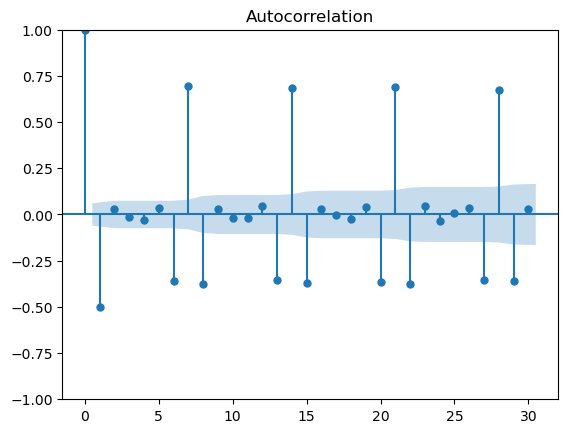

<Figure size 1200x600 with 0 Axes>

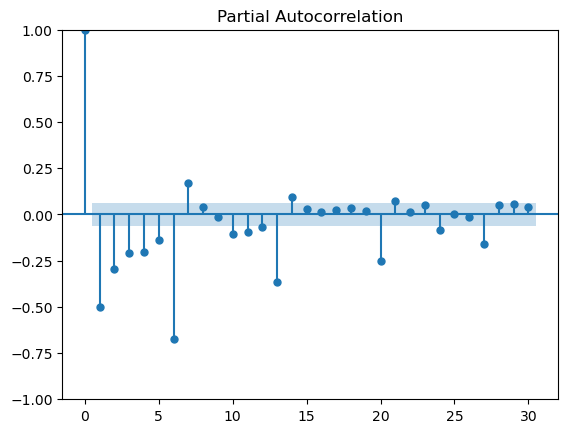

In [10]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for the differenced data
plt.figure(figsize=(12, 6))
plot_acf(daily_counts_diff, lags=30)  # ACF plot for 30 lags
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(daily_counts_diff, lags=30)  # PACF plot for 30 lags
plt.show()


In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model with p=8, d=1, q=2
sarima_model = SARIMAX(daily_counts,
                       order=(9, 1, 2),  # p=8, d=1 (since we differenced once), q=2
                       seasonal_order=(0, 0, 0, 0),  # No seasonal components for now
                       enforce_stationarity=False,
                       enforce_invertibility=False)

# Fit the model
sarima_result = sarima_model.fit(disp=False)

# Print the summary of the fitted model
print(sarima_result.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1046
Model:               SARIMAX(9, 1, 2)   Log Likelihood               -6687.369
Date:                Thu, 28 Nov 2024   AIC                          13398.739
Time:                        10:04:45   BIC                          13458.056
Sample:                    08-18-2016   HQIC                         13421.245
                         - 06-29-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6278      0.079      7.936      0.000       0.473       0.783
ar.L2         -0.1419      0.039     -3.679      0.000      -0.218      -0.066
ar.L3         -0.1696      0.033     -5.169      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


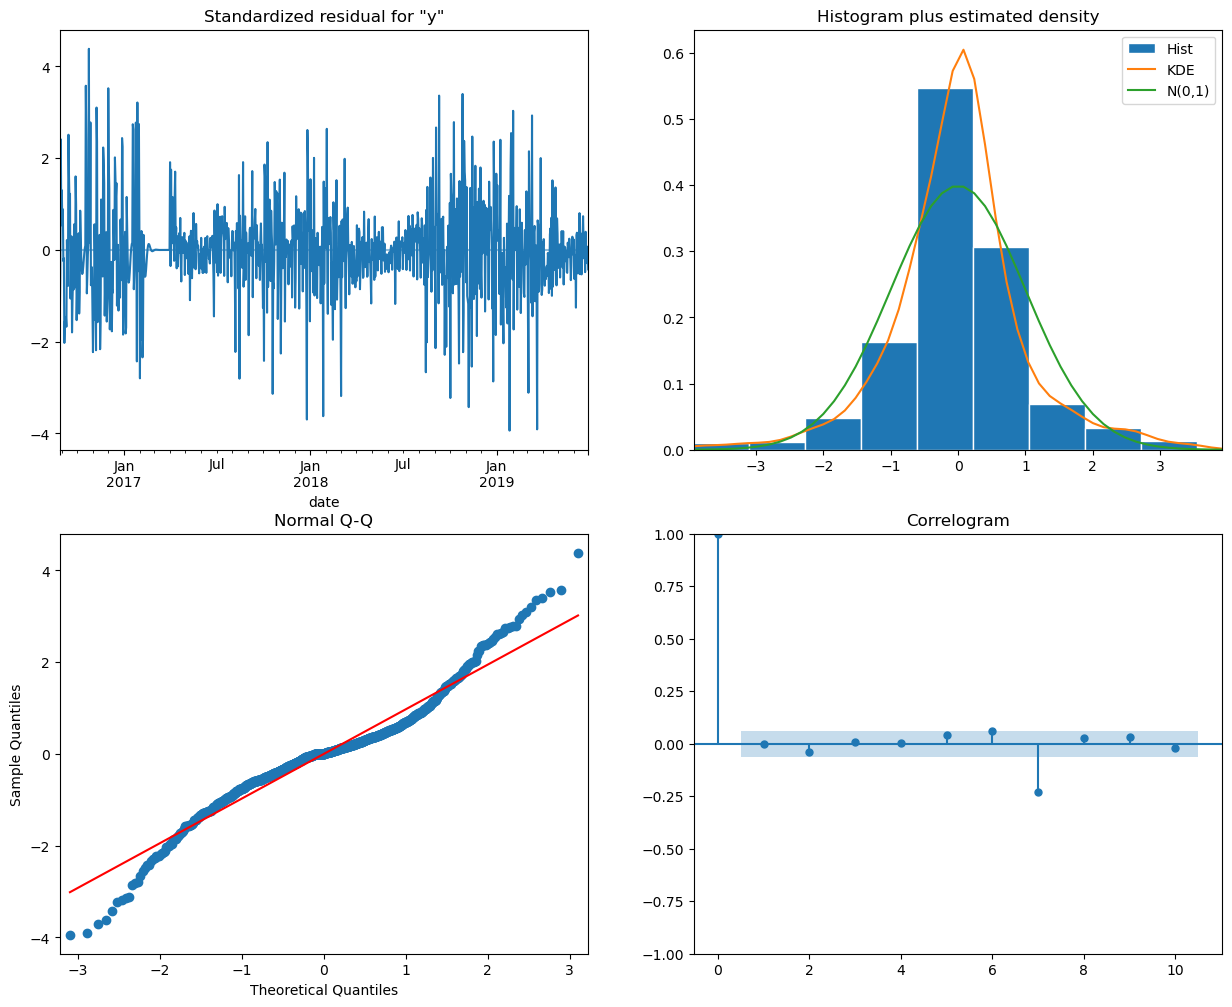

In [12]:
# Plot diagnostics to check residuals (such as autocorrelation and normality)
sarima_result.plot_diagnostics(figsize=(15, 12))
plt.show()


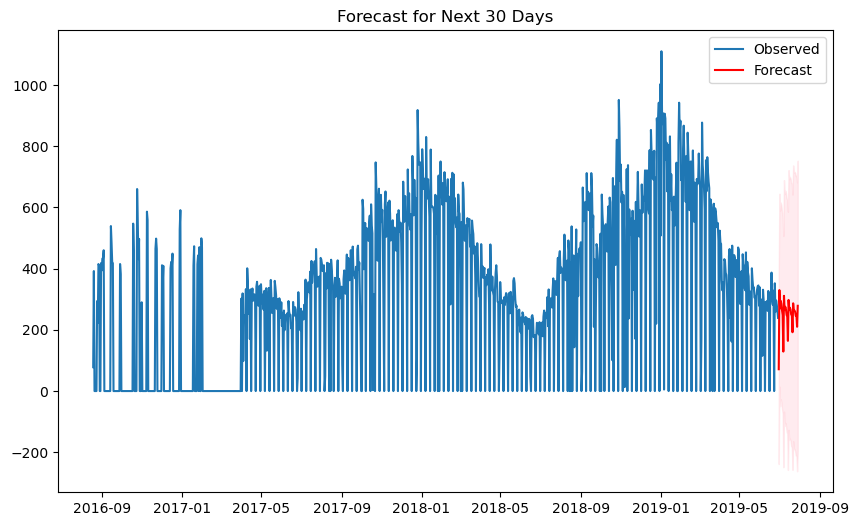

In [13]:
# Forecast for the next 30 days
forecast = sarima_result.get_forecast(steps=30)

# Get the predicted mean of the forecast
forecast_mean = forecast.predicted_mean

# Get the confidence intervals for the forecast
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(daily_counts, label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('Forecast for Next 30 Days')
plt.show()


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Example of splitting the data into train/test (70% train, 30% test)
train_size = int(len(daily_counts) * 0.7)
train, test = daily_counts[:train_size], daily_counts[train_size:]

# Fit SARIMA on the training data
sarima_model_train = SARIMAX(train, order=(8, 1, 2), seasonal_order=(0, 0, 0, 0))
sarima_result_train = sarima_model_train.fit(disp=False)

# Forecast on the test set (same number of steps as the length of the test data)
forecast_test = sarima_result_train.get_forecast(steps=len(test))
forecast_test_mean = forecast_test.predicted_mean

# Calculate the metrics
mae = mean_absolute_error(test, forecast_test_mean)
mse = mean_squared_error(test, forecast_test_mean)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(test, forecast_test_mean)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")


MAE: 266.65828496084015
MSE: 99247.70793859886
RMSE: 315.03604228500404
MAPE: 1.8285929131495258e+17


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [15]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define parameter grid for p, d, q
p = range(0, 9)  # 0 to 8 for p
d = range(0, 2)  # 0 to 1 for d (we already know d=1 worked)
q = range(0, 3)  # 0 to 2 for q

# Create a grid of parameters to try
pdq_combinations = list(itertools.product(p, d, q))

# Store AIC values for comparison
aic_values = []

# Try all combinations and store AIC
for order in pdq_combinations:
    try:
        # Fit SARIMA model with the current order (p, d, q)
        model = SARIMAX(daily_counts, 
                        order=order, 
                        seasonal_order=(0, 0, 0, 0),  # No seasonality yet
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        
        # Fit the model and get the result
        result = model.fit(disp=False)
        
        # Store AIC and parameters
        aic_values.append((order, result.aic))
        
    except Exception as e:
        print(f"Error with order {order}: {e}")
        continue

# Sort by AIC to find the best parameters
sorted_aic_values = sorted(aic_values, key=lambda x: x[1])

# Best order is the one with the lowest AIC
best_order = sorted_aic_values[0][0]
print(f"Best (p, d, q) order: {best_order}")


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: M

Best (p, d, q) order: (8, 1, 2)


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [16]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define parameter grid for P, D, Q (for seasonal components)
P = range(0, 3)  # 0 to 2 for P
D = range(0, 2)  # 0 to 1 for D
Q = range(0, 3)  # 0 to 2 for Q
s = 7  # Weekly seasonality (adjust this if you have a different cycle, e.g., s=365 for yearly)

# Create a grid of seasonal parameters to try
seasonal_combinations = list(itertools.product(P, D, Q))

# Store seasonal AIC values for comparison
seasonal_aic_values = []

# Try all combinations of seasonal parameters
for seasonal_order in seasonal_combinations:
    try:
        # Fit SARIMA model with both non-seasonal and seasonal parameters
        model = SARIMAX(daily_counts,
                        order=best_order,  # Use best (p, d, q) order found earlier
                        seasonal_order=(seasonal_order[0], seasonal_order[1], seasonal_order[2], s),
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        
        # Fit the model and get the result
        result = model.fit(disp=False)
        
        # Store AIC and seasonal parameters
        seasonal_aic_values.append((seasonal_order, result.aic))
        
    except Exception as e:
        print(f"Error with seasonal order {seasonal_order}: {e}")
        continue

# Sort by AIC to find the best seasonal parameters
sorted_seasonal_aic_values = sorted(seasonal_aic_values, key=lambda x: x[1])

# Best seasonal order is the one with the lowest AIC
best_seasonal_order = sorted_seasonal_aic_values[0][0]
print(f"Best seasonal order (P, D, Q, s): {best_seasonal_order}")


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: M

Error with seasonal order (1, 0, 0): Invalid model: autoregressive lag(s) {7} are in both the seasonal and non-seasonal autoregressive components.
Error with seasonal order (1, 0, 1): Invalid model: autoregressive lag(s) {7} are in both the seasonal and non-seasonal autoregressive components.
Error with seasonal order (1, 0, 2): Invalid model: autoregressive lag(s) {7} are in both the seasonal and non-seasonal autoregressive components.
Error with seasonal order (1, 1, 0): Invalid model: autoregressive lag(s) {7} are in both the seasonal and non-seasonal autoregressive components.
Error with seasonal order (1, 1, 1): Invalid model: autoregressive lag(s) {7} are in both the seasonal and non-seasonal autoregressive components.
Error with seasonal order (1, 1, 2): Invalid model: autoregressive lag(s) {7} are in both the seasonal and non-seasonal autoregressive components.
Error with seasonal order (2, 0, 0): Invalid model: autoregressive lag(s) {7} are in both the seasonal and non-seasona

In [17]:
# Fit the final SARIMA model with both non-seasonal and seasonal parameters
final_model = SARIMAX(daily_counts,
                      order=best_order,  # Best non-seasonal (p, d, q) found earlier
                      seasonal_order=(0, 1, 2, 7),  # Best seasonal order (P=0, D=1, Q=2, s=7)
                      enforce_stationarity=False,
                      enforce_invertibility=False)

# Fit the model
final_result = final_model.fit(disp=False)

# Print model summary
print(final_result.summary())

# Evaluate performance (AIC, BIC)
print(f"Final AIC: {final_result.aic}")
print(f"Final BIC: {final_result.bic}")


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 1046
Model:             SARIMAX(8, 1, 2)x(0, 1, 2, 7)   Log Likelihood               -6470.675
Date:                           Thu, 28 Nov 2024   AIC                          12967.350
Time:                                   10:05:36   BIC                          13031.421
Sample:                               08-18-2016   HQIC                         12991.676
                                    - 06-29-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7732      0.222      3.489      0.000       0.339       1.207
ar.L2         -0.0166      0.049     -0.340

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


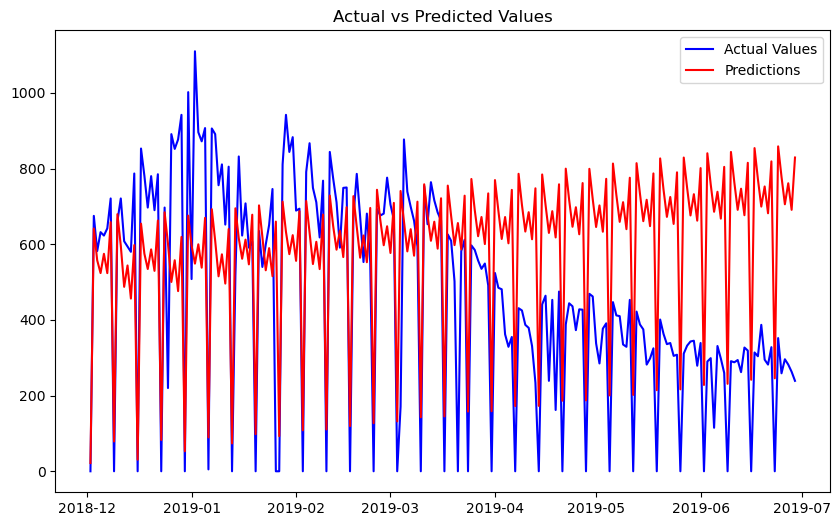

MAE: 236.87770270401654
MSE: 80399.81896502648
RMSE: 283.5486183444146
MAPE: inf%


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Split the data into training and test sets
train_size = int(len(daily_counts) * 0.8)  # 80% for training, 20% for testing
train, test = daily_counts[:train_size], daily_counts[train_size:]

# Fit the model on the training set
final_model = SARIMAX(train,
                      order=best_order,  # Best (p, d, q) from previous step
                      seasonal_order=(0, 1, 2, 7),  # Best seasonal (P, D, Q, s)
                      enforce_stationarity=False,
                      enforce_invertibility=False)

# Fit the model
final_result = final_model.fit(disp=False)

# Generate predictions on the test set
predictions = final_result.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# Plot actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(test.index, test, label='Actual Values', color='blue')
plt.plot(test.index, predictions, label='Predictions', color='red')
plt.legend()
plt.title("Actual vs Predicted Values")
plt.show()

# Evaluate performance using various metrics
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - predictions) / test)) * 100

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")


In [19]:
# Remove zero values from the test set for MAPE calculation
non_zero_mask = test != 0
test_non_zero = test[non_zero_mask]
predictions_non_zero = predictions[non_zero_mask]

# Calculate MAPE only for non-zero actual values
mape = np.mean(np.abs((test_non_zero - predictions_non_zero) / test_non_zero)) * 100

# Print all metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")


MAE: 236.87770270401654
MSE: 80399.81896502648
RMSE: 283.5486183444146
MAPE: 75.15546613660987%


In [32]:
df=pd.read_csv("respiratory_disease.csv")

In [26]:
df


,date,district,city,facilityid,doctorname,medongoid,appointmenttime,gender,age,diagnosis,is_respiratory,respiratory_diagnosis
0,2019-01-04,West,Vikas Puri,310710,Dr. Ravikant,1.367039e+09,10:06:51,1,28.0,['influenza'],True,True
1,2019-06-29,West,Uttam Nagar,320712,Dr. R.C.Khanna,1.367939e+09,11:18:14,0,52.0,['acute nasopharyngitis'],True,True
2,2017-04-26,West,Uttam Nagar,320720,Pramod,1.121171e+09,10:41:09,1,3.0,['acute upper respiratory infections'],True,True
3,2019-06-29,West,Uttam Nagar,320712,Dr. R.C.Khanna,1.367938e+09,12:42:33,0,6.0,['acute nasopharyngitis'],True,True
4,2019-06-28,West,Uttam Nagar,320720,Pramod,1.367938e+09,12:21:19,0,26.0,['bronchitis'],True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
337300,2017-12-19,West,Shakurbasti,150706,guest.150706,1.354077e+09,22:22:40,0,15.0,['acute nasopharyngitis'],True,True
337301,2018-05-04,West,Nangloi,110703,guest.110703,1.125356e+09,13:14:16,1,25.0,['acute upper respiratory infections'],True,True
337302,2018-02-23,West,Uttam Nagar,320721,guest.320721,1.053347e+09,11:33:20,1,56.0,['acute nasopharyngitis'],True,True
337303,2017-06-27,West,Rajouri Garden,270707,guest.270707,1.284592e+09,10:39:19,1,1.3,['acute upper respiratory infections'],True,True


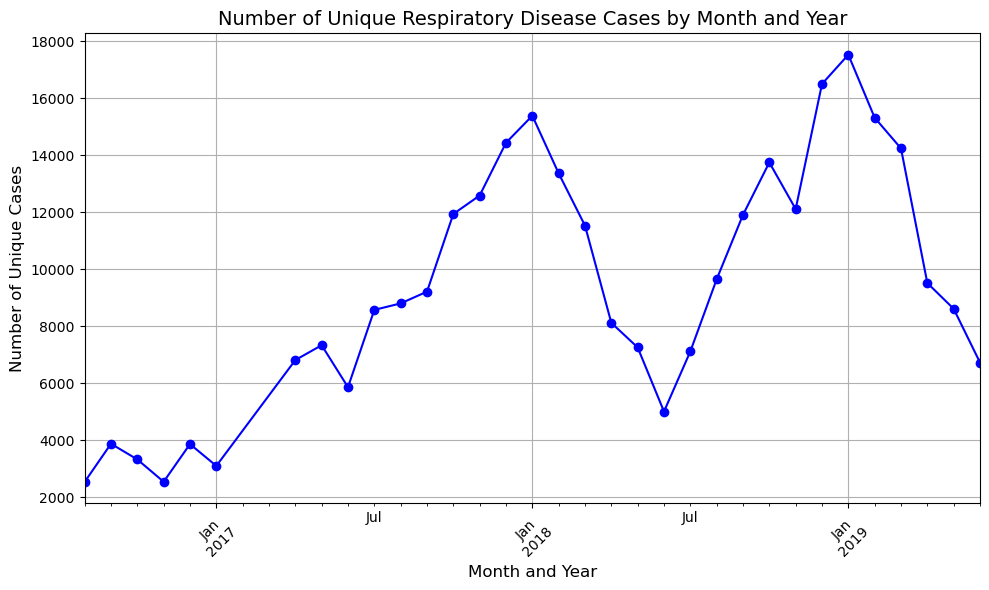

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract the year and month from the 'date' column
df['year_month'] = df['date'].dt.to_period('M')

# Count the unique medongoid for each year-month
unique_cases = df.groupby('year_month')['medongoid'].nunique()

# Plot the line graph
plt.figure(figsize=(10, 6))
unique_cases.plot(kind='line', marker='o', color='b')

# Add title and labels
plt.title('Number of Unique Respiratory Disease Cases by Month and Year', fontsize=14)
plt.xlabel('Month and Year', fontsize=12)
plt.ylabel('Number of Unique Cases', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()



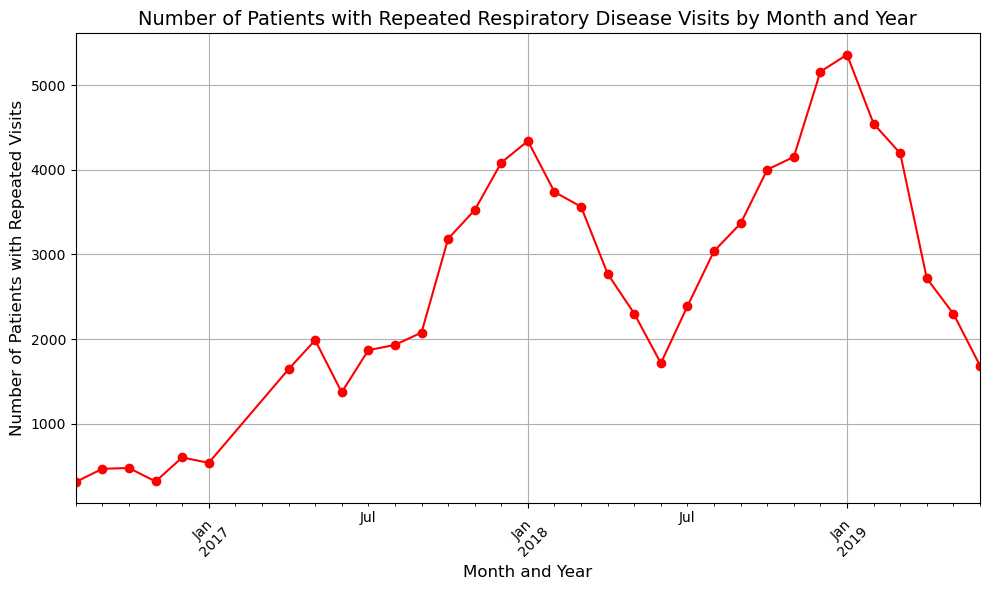

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract the year and month from the 'date' column
df['year_month'] = df['date'].dt.to_period('M')

# Count the occurrences of 'medongoid' to identify repeated visits
visit_counts = df['medongoid'].value_counts()

# Filter to only include medongoid values with more than one visit (i.e., repeated visits)
repeated_visits = visit_counts[visit_counts > 1]

# Merge this information back into the original dataframe to identify repeated visits per row
df['repeated_visit'] = df['medongoid'].isin(repeated_visits.index)

# Now, group by year-month and count the number of repeated visits
repeated_visits_monthly = df[df['repeated_visit']].groupby('year_month')['medongoid'].nunique()

# Plot the graph
plt.figure(figsize=(10, 6))
repeated_visits_monthly.plot(kind='line', marker='o', color='r')

# Add title and labels
plt.title('Number of Patients with Repeated Respiratory Disease Visits by Month and Year', fontsize=14)
plt.xlabel('Month and Year', fontsize=12)
plt.ylabel('Number of Patients with Repeated Visits', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [49]:
df=pd.read_csv("respiratory_disease.csv")
df

,date,district,city,facilityid,doctorname,medongoid,appointmenttime,gender,age,diagnosis,is_respiratory,respiratory_diagnosis
0,2019-01-04,West,Vikas Puri,310710,Dr. Ravikant,1.367039e+09,10:06:51,1,28.0,['influenza'],True,True
1,2019-06-29,West,Uttam Nagar,320712,Dr. R.C.Khanna,1.367939e+09,11:18:14,0,52.0,['acute nasopharyngitis'],True,True
2,2017-04-26,West,Uttam Nagar,320720,Pramod,1.121171e+09,10:41:09,1,3.0,['acute upper respiratory infections'],True,True
3,2019-06-29,West,Uttam Nagar,320712,Dr. R.C.Khanna,1.367938e+09,12:42:33,0,6.0,['acute nasopharyngitis'],True,True
4,2019-06-28,West,Uttam Nagar,320720,Pramod,1.367938e+09,12:21:19,0,26.0,['bronchitis'],True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
337300,2017-12-19,West,Shakurbasti,150706,guest.150706,1.354077e+09,22:22:40,0,15.0,['acute nasopharyngitis'],True,True
337301,2018-05-04,West,Nangloi,110703,guest.110703,1.125356e+09,13:14:16,1,25.0,['acute upper respiratory infections'],True,True
337302,2018-02-23,West,Uttam Nagar,320721,guest.320721,1.053347e+09,11:33:20,1,56.0,['acute nasopharyngitis'],True,True
337303,2017-06-27,West,Rajouri Garden,270707,guest.270707,1.284592e+09,10:39:19,1,1.3,['acute upper respiratory infections'],True,True


In [50]:
import pandas as pd

# Load your data
df['date'] = pd.to_datetime(df['date'])

# Aggregate daily counts of respiratory cases
daily_cases = df.groupby('date').size().reset_index(name='respiratory_cases')

print(daily_cases.head())


        date  respiratory_cases
0 2016-08-18                 78
1 2016-08-19                392
2 2016-08-24                294
3 2016-08-25                223
4 2016-08-26                415


In [51]:
# Create lagged features
for lag in range(1, 8):  # Lag for the past 7 days
    daily_cases[f'lag_{lag}'] = daily_cases['respiratory_cases'].shift(lag)

# Add rolling average for smoothing
daily_cases['rolling_mean_7'] = daily_cases['respiratory_cases'].rolling(window=7).mean()

# Drop rows with NaN values from lagged features
daily_cases = daily_cases.dropna()


In [52]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = daily_cases.drop(['date', 'respiratory_cases'], axis=1)
y = daily_cases['respiratory_cases']

# Train-test split (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [53]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Initialize and train the XGBoost regressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 60.013779309331156


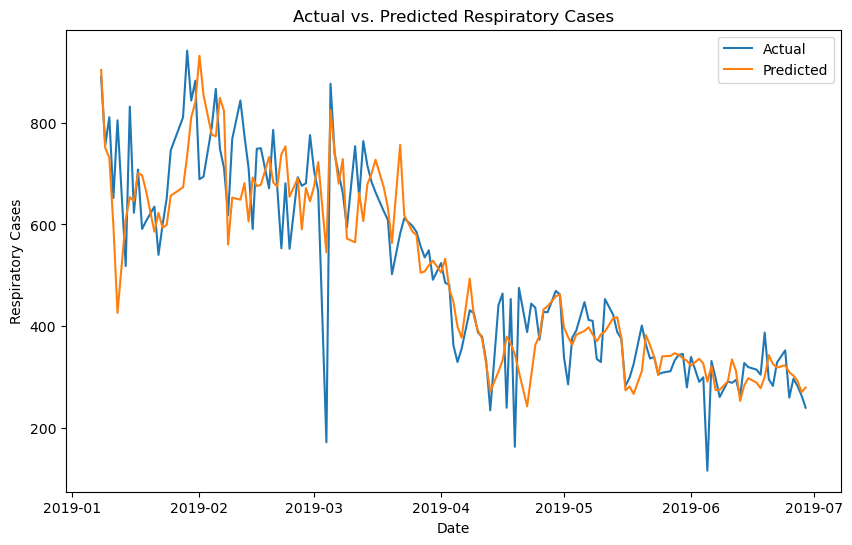

In [54]:
import matplotlib.pyplot as plt

# Plot predictions vs. actuals
plt.figure(figsize=(10, 6))
plt.plot(daily_cases['date'][-len(y_test):], y_test, label='Actual')
plt.plot(daily_cases['date'][-len(y_test):], y_pred, label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Respiratory Cases')
plt.title('Actual vs. Predicted Respiratory Cases')
plt.show()


In [58]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 3, 5],
}

# Initialize XGBoost regressor
xgb = XGBRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=3,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1
)

# Perform grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best MAE:", -grid_search.best_score_)


Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.8}
Best MAE: 59.09470505593814


In [59]:
# Retrieve the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_model = XGBRegressor(**best_params)
best_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_best = best_model.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)
print(f"Optimized Mean Absolute Error: {mae_best}")


Optimized Mean Absolute Error: 60.51625642322359


In [60]:
from sklearn.model_selection import RandomizedSearchCV

# Randomized search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,  # Number of combinations to test
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters (Random Search):", random_search.best_params_)
print("Best MAE (Random Search):", -random_search.best_score_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters (Random Search): {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 1.0}
Best MAE (Random Search): 61.01310687355402


In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions
y_pred = best_model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 60.51625642322359
Mean Squared Error (MSE): 6866.645924151348
Root Mean Squared Error (RMSE): 82.86522747299585
R-squared (R²): 0.816900825144146


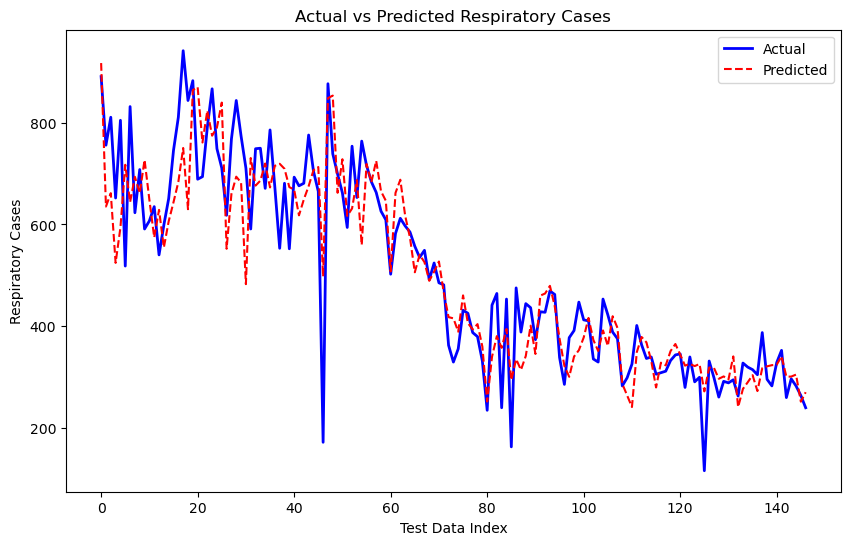

In [62]:
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual', color='blue', linewidth=2)
plt.plot(range(len(y_test)), y_pred, label='Predicted', color='red', linestyle='dashed')
plt.xlabel('Test Data Index')
plt.ylabel('Respiratory Cases')
plt.title('Actual vs Predicted Respiratory Cases')
plt.legend()
plt.show()


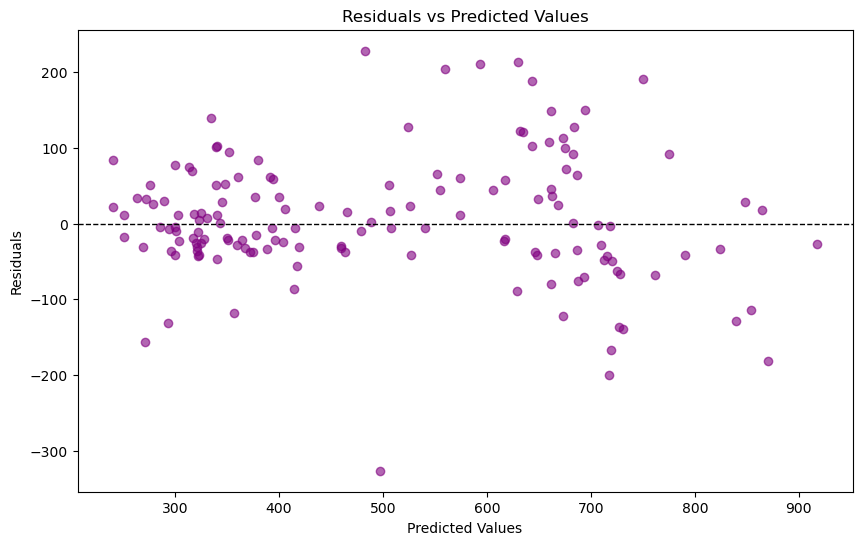

In [63]:
# Calculate residuals
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple')
plt.axhline(0, linestyle='dashed', color='black', linewidth=1)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


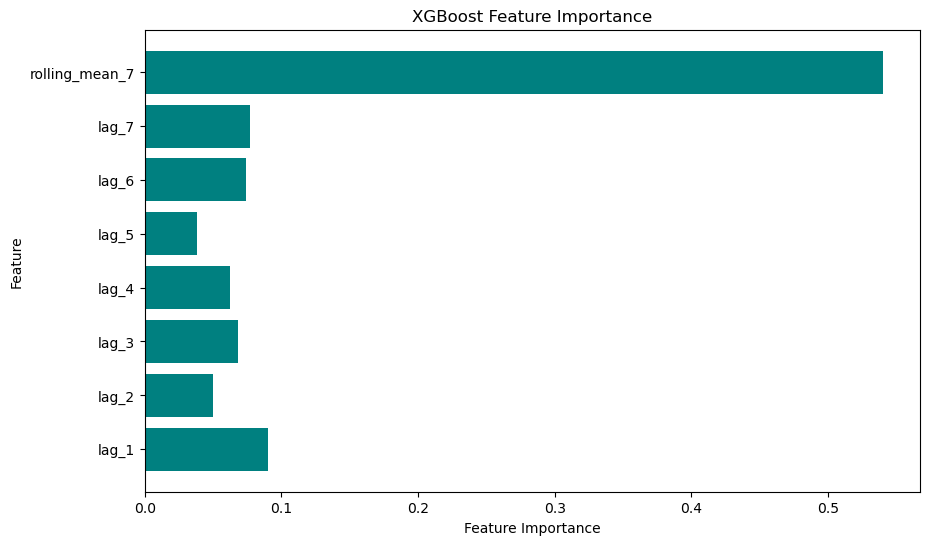

In [64]:
# Feature importance
importances = best_model.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='teal')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.show()


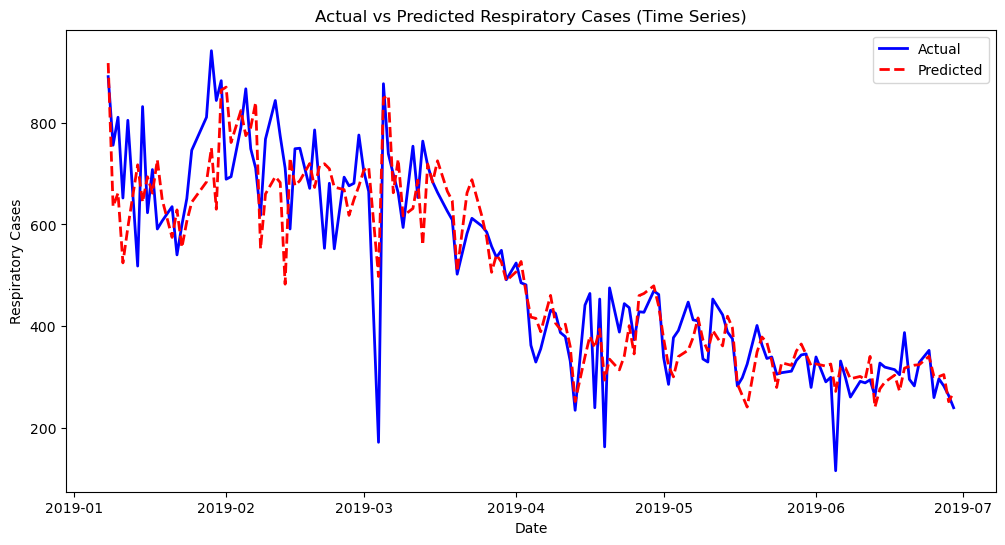

In [65]:
# Create a dataframe for plotting
results_df = daily_cases[-len(y_test):].copy()  # Align with test data
results_df['predicted'] = y_pred

# Plot
plt.figure(figsize=(12, 6))
plt.plot(results_df['date'], results_df['respiratory_cases'], label='Actual', linewidth=2, color='blue')
plt.plot(results_df['date'], results_df['predicted'], label='Predicted', linewidth=2, linestyle='dashed', color='red')
plt.xlabel('Date')
plt.ylabel('Respiratory Cases')
plt.title('Actual vs Predicted Respiratory Cases (Time Series)')
plt.legend()
plt.show()


In [2]:
import pandas as pd
df = pd.read_csv("final-data.csv")
len(df)

C:\Users\vidhi\AppData\Local\Temp\ipykernel_4796\3291840003.py:2: DtypeWarning: Columns (13,15,17,18,19,20,21,22,23,24,26,28,49,50,51,52,53,54,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("final-data.csv")


2230551

In [3]:
df.head()

,date,district,city,facilityid,doctorname,medongoid,appointmenttime,gender,age,diagnosis,...,duration_11,drug_12,dosage_12,duration_12,drug_13,dosage_13,duration_13,drug_14,dosage_14,duration_14
0,2017-06-10,West,Uttam Nagar,320721,NISHANT,1.162021e+09,13:07:17,0,30.0,['body pain'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-04-26,West,Vikas Puri,310710,Dr. Ravikant,1.116585e+09,12:26:25,1,31.0,['acute respiratory tract infection'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-04,West,Vikas Puri,310710,Dr. Ravikant,1.367039e+09,10:06:51,1,28.0,['influenza'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-12-03,West,Vikas Puri,310724,Shailender,1.120420e+09,08:47:58,1,35.0,"['dermatitis+eczema', 'gastroenteritis']",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-06-29,West,Uttam Nagar,320712,Dr. R.C.Khanna,1.367939e+09,11:41:40,1,42.0,['back pain'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df['date'] = pd.to_datetime(df['date'])
df_sorted = df.sort_values(by='date')

In [5]:
df_sorted.head()

,date,district,city,facilityid,doctorname,medongoid,appointmenttime,gender,age,diagnosis,...,duration_11,drug_12,dosage_12,duration_12,drug_13,dosage_13,duration_13,drug_14,dosage_14,duration_14
311428,2016-07-01,West,Uttam Nagar,320720,Pramod,1.184329e+09,NaN,0,12.0,['unknown'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101404,2016-07-01,West,Uttam Nagar,320720,Pramod,1.184328e+09,NaN,0,12.0,['unknown'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216344,2016-07-01,West,Uttam Nagar,320713,Parag,1.173480e+09,NaN,1,29.0,['unknown'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1840153,2016-07-01,West,Nangloi,110703,Nisha,1.184306e+09,NaN,1,0.4,['unknown'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2028519,2016-07-01,West,Nangloi,110704,Anita,1.184570e+09,NaN,0,9.0,['unknown'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_sorted.tail()

,date,district,city,facilityid,doctorname,medongoid,appointmenttime,gender,age,diagnosis,...,duration_11,drug_12,dosage_12,duration_12,drug_13,dosage_13,duration_13,drug_14,dosage_14,duration_14
1188089,2019-06-29,West,Uttam Nagar,320721,NISHANT,1.367571e+09,13:27:49,1,9.6,['arthralgia'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2070996,2019-06-29,West,Vikas Nagar,320714,Chatterjee,1.367932e+09,11:27:00,1,10.0,['acute nasopharyngitis'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6845,2019-06-29,West,Uttam Nagar,320712,Dr. R.C.Khanna,1.367903e+09,10:49:06,0,14.0,['allergic contact dermatitis'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57379,2019-06-29,West,Vikas Puri,310724,Shailender,1.367933e+09,13:21:18,0,9.0,['anemia'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
901923,2019-06-29,West,Madipur,360718,Dr. Narendra,1.059571e+09,10:14:20,1,28.0,['hypothyroidism'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_unique = df[((df['diagnosis'].str.contains('unknown', case=False, na=False)) | (df['drug_1'].str.contains('Unknown', case=False, na=False)))]
len(df_unique)

463479

In [8]:
print(len(df)-len(df_unique))

1767072


In [9]:
# List of respiratory diseases
respiratory_diseases = [
    "acute bronchitis", "acute lower respiratory infection", "acute nasopharyngitis", "acute pharyngitis", "acute respiratory infections",
    "acute sinusitis", "acute upper respiratory infections", "acute upper respiratory infections+multiple or unspecified sites", 
    "allergic bronchitis", "allergic cough", "allergic pneumonia", "allergic pneumonitis", "allergic rhinitis", "asthma", 
    "asthma+known case", "asthmatic bronchitis", "bacterial pneumonia not elsewhere classified", "bronchitis", 
    "bronchitis that is not specified as acute or chronic", "chest wheeze", "chronic cold", "chronic cough", 
    "chronic lower respiratory diseases", "chronic pharyngitis", "chronic respiratory disease", "cold", "cold+allergy", 
    "cold+cough", "cold+cough+fever", "cold+cough+headache", "cold+fever", "cold+pharyngitis", "common cold", 
    "Congenital bronchial atresia", "COPD", "cough+abdominal pain", "cough+body pain", "cough+chest pain", "cough+cold", 
    "cough+dyspnea", "cough+expectoration", "cough+hemoptysis", "cough+hypertension", "dry cough", "dyspnea", 
    "dyspnea+chronic obstructive pulmonary disease", "dyspnea+copd", "emphysema", "hib pneumonia", "hyperpneumonitis", 
    "hypersensitivity pneumonitis", "hypersensitivity pneumonitis+treatment", "infection+chest", "infection+nose", 
    "inflammation+nasal ala", "influenza", "influenza caused by an identified influenza virus", "influenza+anemia", 
    "influenza+pneumonia", "laryngeal disorder", "laryngitis", "lower respiratory tract infection", 
    "lower respiratory tract infection+bronchitis", "lung cancer", "lung metastases", "other chronic obstructive pulmonary disease", 
    "pertussis", "pharyngitis", "pharyngitis+swelling", "pleural effusion", "pleurisy", "pleuritis", "pneumococcal pneumonia", 
    "pneumocystis", "pneumonia", "pneumonia, unspecified organism", "pneumonia+recovering", "pneumonitis", "pneumonitis+recovering", 
    "pneumothorax", "pulmonary tuberculosis", "purulent cough", "purulent sputum", "respiratory syncytial virus", 
    "respiratory tract infection", "respiratory tract infections", "rhinitis", "rhinorrhea", "sinus", "sinus formation at operative site", 
    "sinus tachycardia", "sinusitis", "sneezing", "status asthmaticus", "sternutation", "swelling+throat", "swine flu", 
    "tachypnea", "throat infection", "throat irritation", "throat swelling", "tonsillitis", "tonsillopharyngitis", 
    "tropical pulmonary eosinophilia", "unspecified acute lower respiratory infection", "unspecified chronic bronchitis", 
    "upper respiratory cough", "upper respiratory infection", "upper respiratory infection+common cold", 
    "upper respiratory infection+fever", "upper respiratory infection+pain", "upper respiratory tract infection", 
    "upper respiratory tract infection+cold", "upper respiratory tract infections", "viral flu", "viral influenza", 
    "viral pneumonia, not elsewhere classified", "viral+cough", "wheezing"
]

# Convert diagnosis from string to actual list using ast.literal_eval
df['diagnosis'] = df['diagnosis'].apply(ast.literal_eval)

# Function to check if diagnosis contains respiratory diseases
def is_respiratory(diagnoses):
    return any(diagnosis in respiratory_diseases for diagnosis in diagnoses)

# Apply the function to create a new column for respiratory classification
df['is_respiratory'] = df['diagnosis'].apply(is_respiratory)

# Count respiratory vs non-respiratory diseases
disease_counts = df['is_respiratory'].value_counts()

# Ensure the labels match the values in disease_counts
print(disease_counts)

NameError: name 'ast' is not defined